Let’s analyze a few Langmuir probe characteristics using the diagnostics.langmuir

In [ ]:
pip install plasmapy

In [11]:
import plasmapy

In [30]:
%matplotlib inline

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import os

from pathlib import Path
from pprint import pprint

from plasmapy.diagnostics.langmuir import Characteristic, swept_probe_analysis

In [35]:
from plasmapy.diagnostics.langmuir import Characteristic, swept_probe_analysis
path = (Path.cwd() / ".." / "/content/Beckers2017b.npy").resolve()
bias, current = np.load(path)

The first characteristic we analyze is a simple single-probe measurement in a low (ion) temperature, low density plasma with a cylindrical probe.  The data has been preprocessed with some smoothing, which allows us to obtain a Electron Energy Distribution Function (EEDF) as well.

In [43]:
# Load the bias and current values stored in the .p pickle file

In [37]:
path = (Path.cwd() / ".." / "/content/Beckers2017b.npy").resolve()
bias, current = np.load(path)

In [44]:
# Create the Characteristic object, taking into account the correct units

In [38]:
characteristic = Characteristic(u.Quantity(bias, u.V), u.Quantity(current, u.A))

/usr/local/lib/python3.10/dist-packages/plasmapy/diagnostics/langmuir.py:35: FutureWarning: The plasmapy.diagnostics.langmuir module will be deprecated in favor of the plasmapy.analysis.swept_langmuir sub-package and phased out over 2021.  The plasmapy.analysis package was released in v0.5.0.
  warn(


In [40]:
characteristic = Characteristic(u.Quantity(bias, u.V), u.Quantity(current, u.A))

In [45]:
# Calculate the cylindrical probe surface area

In [41]:
probe_length = 1.145 * u.mm
probe_diameter = 1.57 * u.mm
probe_area = probe_length * np.pi * probe_diameter + np.pi * 0.25 * probe_diameter**2

Now we can actually perform the analysis. Since the plasma is in Helium an ion mass number of 4 is entered. The results are visualized and the obtained EEDF is also shown.

{'I_es': <Quantity 0.02655063 A>,
 'I_is': <Quantity -0.00080287 A>,
 'T_e': <Quantity 6.10953349 eV>,
 'V_F': <Quantity -21.29773863 V>,
 'V_P': <Quantity 2.42370446 V>,
 'n_e': <Quantity 5.28414774e+16 1 / m3>,
 'n_i': <Quantity 9.0746129e+16 1 / m3>,
 'n_i_OML': <Quantity 6.08613986e+16 1 / m3>}


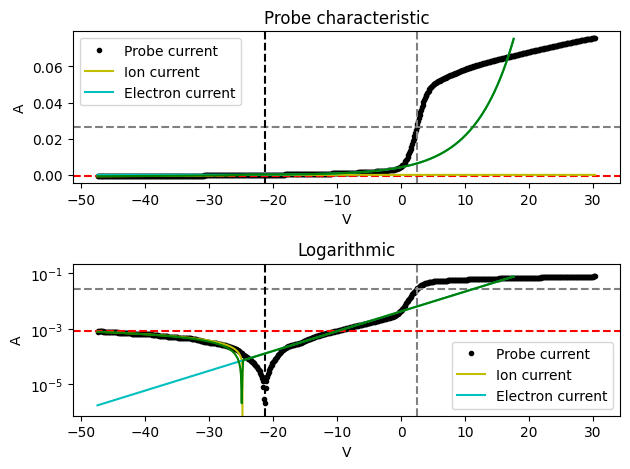

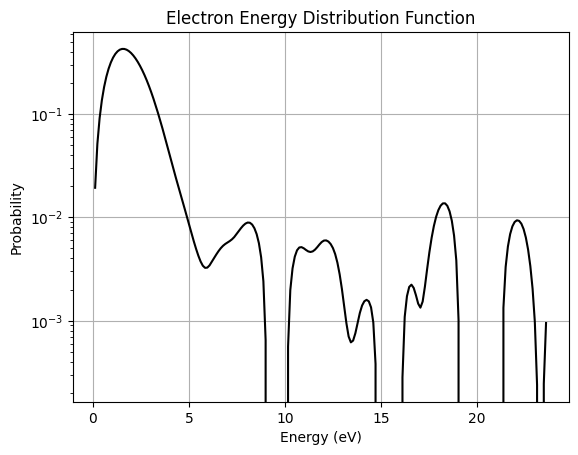

In [42]:
pprint(
    swept_probe_analysis(
        characteristic, probe_area, "He-4+", visualize=True, plot_EEDF=True
    )
)

**The cyan and yellow lines indicate the fitted electron and ion currents, respectively. The green line is the sum of these and agrees nicely with the data. This indicates a successful analysis.**

The next sample probe data is provided by David Pace. It is also obtained from a low relatively ion temperature and density plasma, in Argon.

In [46]:
# Load the data from a file and create the Characteristic object

In [47]:
path = (Path.cwd() / ".." / "/content/Pace2015.npy").resolve()
bias, current = np.load(path)

In [48]:
characteristic = Characteristic(u.Quantity(bias, u.V), u.Quantity(current, u.A))

Initially the electrons are assumed to be Maxwellian. To check this the fit of the electron growth region will be plotted.

{'V_P': <Quantity -16.4 V>,
 'V_F': <Quantity -35.6 V>,
 'I_es': <Quantity 0.00282382 A>,
 'I_is': <Quantity -0.000129 A>,
 'n_e': <Quantity 7.60824394e+14 1 / m3>,
 'n_i': <Quantity 6.23732195e+15 1 / m3>,
 'T_e': <Quantity 3.51990715 eV>,
 'n_i_OML': <Quantity 3.07522416e+15 1 / m3>}

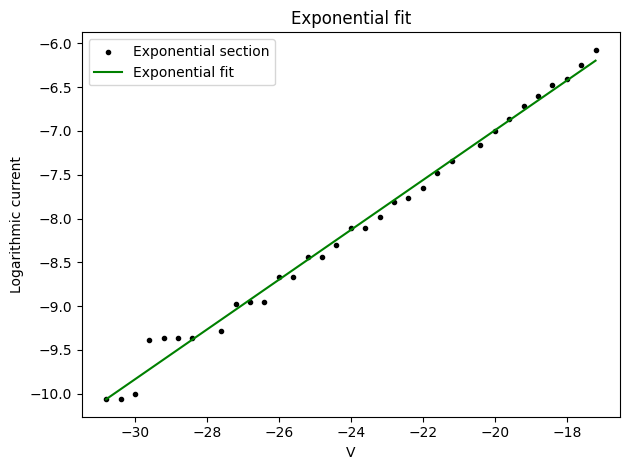

In [49]:
swept_probe_analysis(
    characteristic,
    0.738 * u.cm**2,
    "Ar-40 1+",
    bimaxwellian=False,
    plot_electron_fit=True,
)

It can be seen that this plasma is slightly bi-Maxwellian, as there are two distinct slopes in the exponential section. The analysis is now performed with bimaxwellian set to True, which yields improved results.

{'I_es': <Quantity 0.00282382 A>,
 'I_is': <Quantity -0.000129 A>,
 'T_e': <Quantity [2.11016969, 3.27419026] eV>,
 'V_F': <Quantity -35.6 V>,
 'V_P': <Quantity -16.4 V>,
 'hot_fraction': 0.5065258666100141,
 'n_e': <Quantity 8.68732659e+14 1 / m3>,
 'n_i': <Quantity 7.12196576e+15 1 / m3>,
 'n_i_OML': <Quantity 3.07522416e+15 1 / m3>}


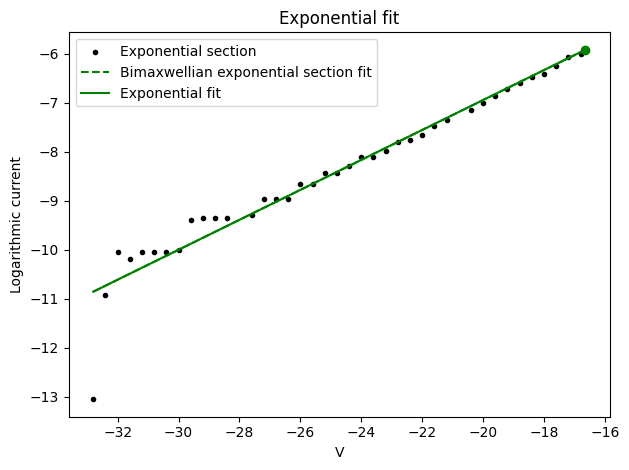

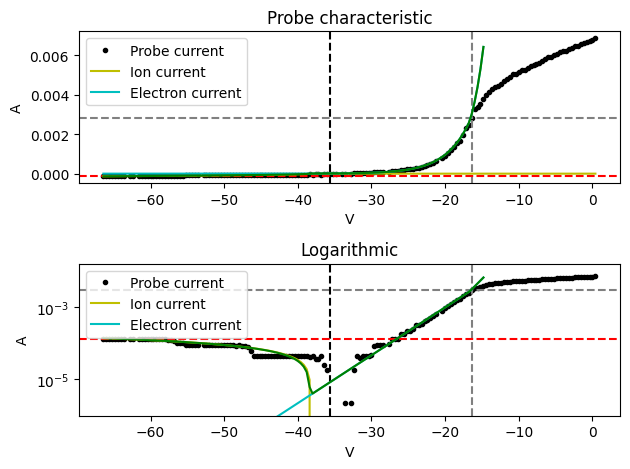

In [50]:
pprint(
    swept_probe_analysis(
        characteristic,
        0.738 * u.cm**2,
        "Ar-40 1+",
        bimaxwellian=True,
        visualize=True,
        plot_electron_fit=True,
    )
)

The probe current resolution of the raw data is relatively poor, but the analysis still performs well in the ion current region. The bi-Maxwellian properties are not significant but do make a difference. Check this analysis without setting bimaxwellian to True! This is reflected in the results, which indicate that the temperatures of the cold and hot electron population are indeed different, but relatively close.

This Helium plasma is fully bi-Maxwellian.

In [51]:
# Import probe data and calculate probe surface area.

In [52]:
path = (Path.cwd() / ".." / "/content/Beckers2017b.npy").resolve()
bias, current = np.load(path)
characteristic = Characteristic(u.Quantity(bias, u.V), u.Quantity(current, u.A))
probe_length = 1.145 * u.mm
probe_diameter = 1.57 * u.mm
probe_area = probe_length * np.pi * probe_diameter + np.pi * 0.25 * probe_diameter**2

plot_electron_fit is set to True to check the bi-Maxwellian properties. The fit converges nicely to the two slopes of the electron growth region.

{'I_es': <Quantity 0.02655063 A>,
 'I_is': <Quantity -0.00080287 A>,
 'T_e': <Quantity [1.33644199, 6.45311087] eV>,
 'V_F': <Quantity -21.29773863 V>,
 'V_P': <Quantity 2.42370446 V>,
 'hot_fraction': 0.1880600454328589,
 'n_e': <Quantity 8.6146857e+16 1 / m3>,
 'n_i': <Quantity 1.47942378e+17 1 / m3>,
 'n_i_OML': <Quantity 6.08613986e+16 1 / m3>}


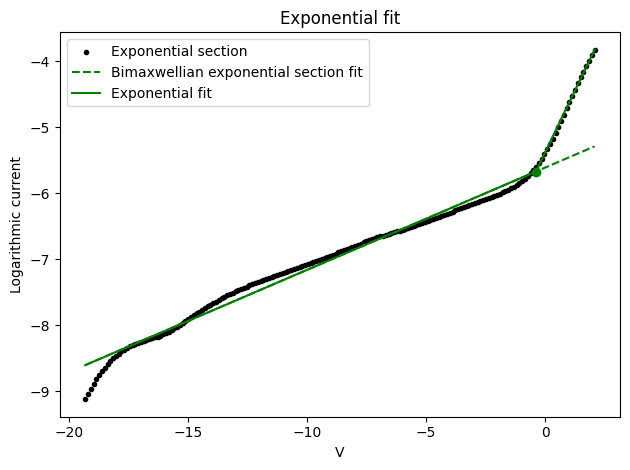

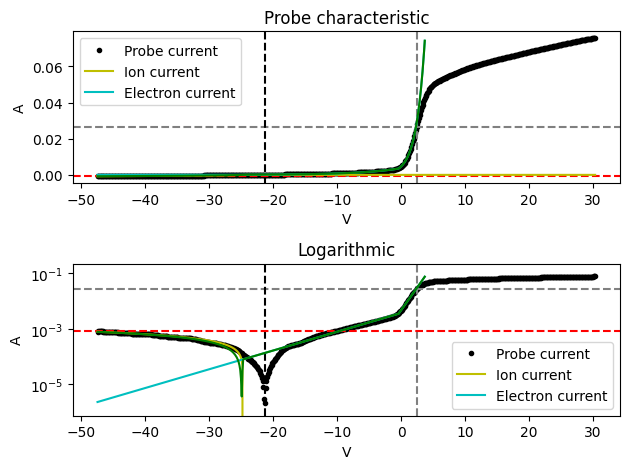

In [53]:
pprint(
    swept_probe_analysis(
        characteristic,
        probe_area,
        "He-4+",
        bimaxwellian=True,
        plot_electron_fit=True,
        visualize=True,
    )
)